In [5]:
# 📁 Batch Feature Engineering for All Stocks
# Author: Rehan Chaudhry

import pandas as pd
import numpy as np
from pathlib import Path

# Paths 
raw_dir = Path("../data/raw")
processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# Helper function to clean and engineer features
def process_stock_file(file_path):
    ticker = file_path.stem.replace(".US", "")
    print(f"🔧 Processing: {ticker}")

    try:
        df = pd.read_csv(file_path)
        df.columns = [col.lower() for col in df.columns]
        df['date'] = pd.to_datetime(df['date'])
        df.sort_values('date', inplace=True)
        df.set_index('date', inplace=True)

        # Feature Engineering
        df['daily_return'] = df['close'].pct_change()
        df['volatility_7'] = df['daily_return'].rolling(window=7).std()
        df['volatility_30'] = df['daily_return'].rolling(window=30).std()
        df['cum_return'] = (1 + df['daily_return']).cumprod()

        df = df.dropna()

        # Add ticker column for later merging
        df['ticker'] = ticker

        # Save processed CSV
        output_path = processed_dir / f"{ticker}_features.csv"
        df.reset_index().to_csv(output_path, index=False)
        print(f"✅ Saved: {output_path.name}")
    
    except Exception as e:
        print(f"❌ Failed to process {file_path.name}: {e}")

# Process all CSVs in raw data folder
for file in raw_dir.glob("*.csv"):
    process_stock_file(file)

print("🏁 All stocks processed.")


🔧 Processing: AAPL
✅ Saved: AAPL_features.csv
🔧 Processing: AMZN
✅ Saved: AMZN_features.csv
🔧 Processing: GOOGL
✅ Saved: GOOGL_features.csv
🔧 Processing: MSFT
✅ Saved: MSFT_features.csv
🔧 Processing: TSLA
✅ Saved: TSLA_features.csv
🏁 All stocks processed.


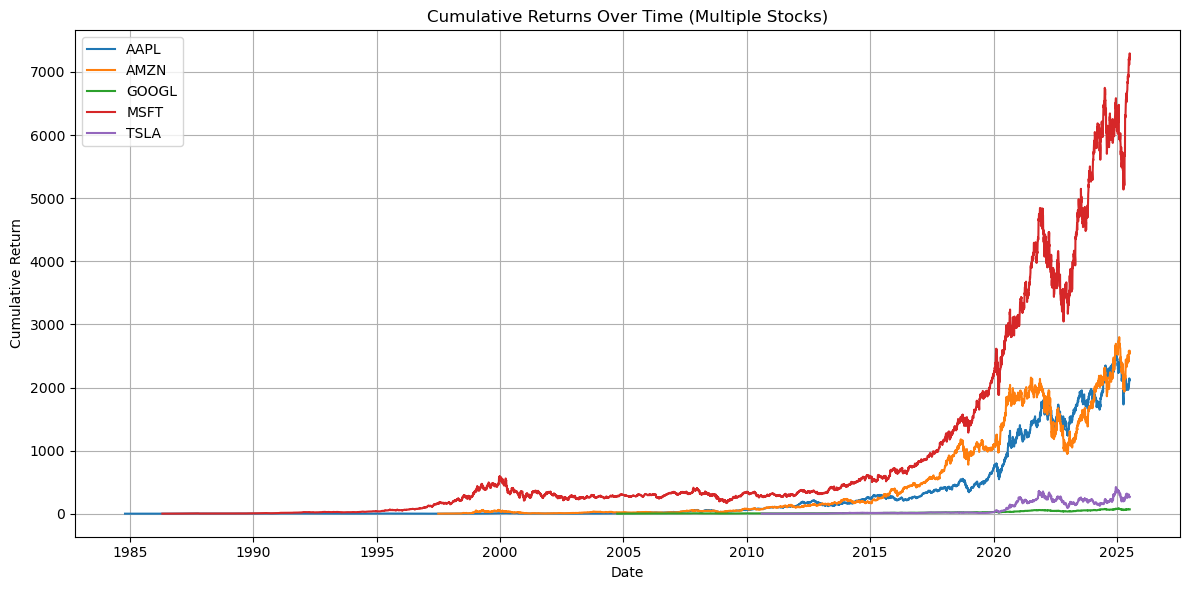

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

processed_dir = Path("../data/processed")
plt.figure(figsize=(12, 6))

for file in processed_dir.glob("*_features.csv"):
    df = pd.read_csv(file)
    ticker = file.stem.split("_")[0]
    df['date'] = pd.to_datetime(df['date'])
    plt.plot(df['date'], df['cum_return'], label=ticker)

plt.title("Cumulative Returns Over Time (Multiple Stocks)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


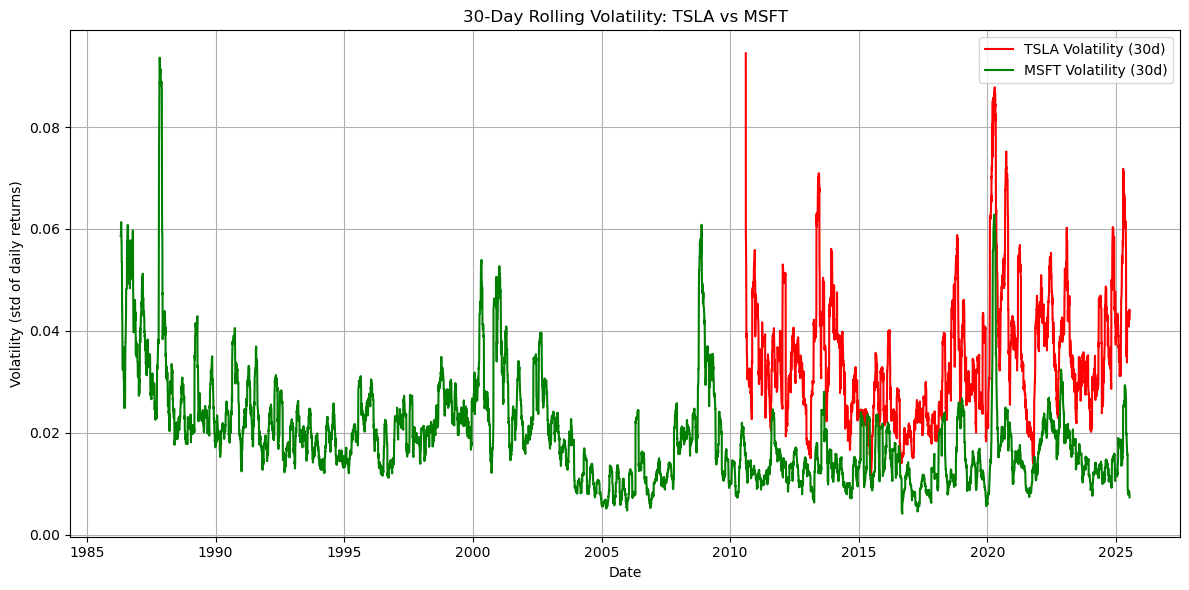

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['TSLA', 'MSFT']
colors = ['red', 'green']

plt.figure(figsize=(12, 6))

for ticker, color in zip(tickers, colors):
    df = pd.read_csv(f"../data/processed/{ticker}_features.csv")
    df['date'] = pd.to_datetime(df['date'])
    plt.plot(df['date'], df['volatility_30'], label=f"{ticker} Volatility (30d)", color=color)

plt.title("30-Day Rolling Volatility: TSLA vs MSFT")
plt.xlabel("Date")
plt.ylabel("Volatility (std of daily returns)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
